In [32]:
import scipy.io as sio
import numpy as np
from tqdm import trange

from Utilities.conditional_divergence import *

In [2]:
# hyperparameters
KERNEL_SIZE = 0.05

In [5]:
# load data
EEG_X = sio.loadmat('./SEED_III/EEG_X.mat')['X'][0]     # 15 x 3394 x 310
EEG_Y = sio.loadmat('./SEED_III/EEG_Y.mat')['Y'][0]     # 15 x 3394 x 1

Features = [0] * EEG_X.shape[0]
for i in range(EEG_X.shape[0]):
    Features[i] = np.array(EEG_X[i])

Labels = [0] * EEG_Y.shape[0]
for i in range(EEG_Y.shape[0]):
    Labels[i] = np.array(EEG_Y[i])

print(len(Features))
print(Features[0].shape)
print(len(Labels))
print(Labels[0].shape)

15
(3394, 310)
15
(3394, 1)


In [8]:
Persons_Cov_X = []
Persons_Cov_XY = []
Persons_CorrEnt_X = []
Persons_CorrEnt_XY = []
for i in range(len(Features)):
    print("Person", i)

    data = Features[i].transpose()
    Cov = np.array([[np.cov(data[i,:],data[j,:])[0,1] for j in range(data.shape[0])] for i in range(data.shape[0])])
    Persons_Cov_X.append(Cov)

    # data = Features[i]
    # Corr = corrent_matrix(data, kernel_size=KERNEL_SIZE)
    # Persons_CorrEnt_X.append(Corr)

    data = np.hstack((Features[i], Labels[i])).transpose()
    Cov = np.array([[np.cov(data[i,:],data[j,:])[0,1] for j in range(data.shape[0])] for i in range(data.shape[0])])
    Persons_Cov_XY.append(Cov)

    # data =np.hstack((Features[i], Labels[i]))
    # Corr = corrent_matrix(data, kernel_size=KERNEL_SIZE)
    # Persons_CorrEnt_XY.append(Corr)

Person 0
Person 1
Person 2
Person 3
Person 4
Person 5
Person 6
Person 7
Person 8
Person 9
Person 10
Person 11
Person 12
Person 13
Person 14


In [17]:
von_Neumann_Cov_X =np.zeros((len(Features), len(Features)))
von_Neumann_Cov_XY =np.zeros((len(Features), len(Features)))
# von_Neumann_CorrEnt_X =np.zeros((len(Features), len(Features)))
# von_Neumann_CorrEnt_XY =np.zeros((len(Features), len(Features)))

LogDet_Cov_X =np.zeros((len(Features), len(Features)))
LogDet_Cov_XY =np.zeros((len(Features), len(Features)))
# LogDet_CorrEnt_X =np.zeros((len(Features), len(Features)))
# LogDet_CorrEnt_XY =np.zeros((len(Features), len(Features)))


for i in range(len(Features)):        
    for j in range(len(Features)):
        von_Neumann_Cov_X[i,j] = von_Neumann_divergence_Eff(Persons_Cov_X[i], Persons_Cov_X[j])
        von_Neumann_Cov_XY[i,j] = von_Neumann_divergence_Eff(Persons_Cov_XY[i], Persons_Cov_XY[j])
        # von_Neumann_CorrEnt_X[i,j] = von_Neumann_divergence_Eff(Persons_CorrEnt_X[i], Persons_CorrEnt_X[j])
        # von_Neumann_CorrEnt_XY[i,j] = von_Neumann_divergence_Eff(Persons_CorrEnt_XY[i], Persons_CorrEnt_XY[j])
        LogDet_Cov_X[i,j] = log_det_divergenceEigSort(Persons_Cov_X[i], Persons_Cov_X[j])
        LogDet_Cov_XY[i,j] = log_det_divergenceEigSort(Persons_Cov_XY[i], Persons_Cov_XY[j])
        # LogDet_CorrEnt_X[i,j] = log_det_divergenceEigSort(Persons_CorrEnt_X[i], Persons_CorrEnt_X[j])
        # LogDet_CorrEnt_XY[i,j] = log_det_divergenceEigSort(Persons_CorrEnt_XY[i], Persons_CorrEnt_XY[j])


Div_von_Neumann_Cov =np.zeros((len(Features), len(Features)))
# Div_von_Neumann_CorrEnt =np.zeros((len(Features), len(Features)))
Div_LogDet_Cov =np.zeros((len(Features), len(Features)))
# Div_LogDet_CorrEnt =np.zeros((len(Features), len(Features)))

for i in range(len(Features)):        
    for j in range(i+1):
        Div_von_Neumann_Cov[i,j] = 0.5 * (von_Neumann_Cov_XY[i,j] + von_Neumann_Cov_XY[j,i] - von_Neumann_Cov_X[i,j] - von_Neumann_Cov_X[j,i])
        # Div_von_Neumann_CorrEnt[i,j] = 0.5*(von_Neumann_CorrEnt_XY[i,j] + von_Neumann_CorrEnt_XY[j,i] - von_Neumann_CorrEnt_X[i,j] - von_Neumann_CorrEnt_X[j,i])
        Div_LogDet_Cov[i,j] = 0.5 * (LogDet_Cov_XY[i,j] + LogDet_Cov_XY[j,i] - LogDet_Cov_X[i,j] - LogDet_Cov_X[j,i])
        # Div_LogDet_CorrEnt[i,j] = 0.5 * (LogDet_CorrEnt_XY[i,j] + LogDet_CorrEnt_XY[j,i] - LogDet_CorrEnt_X[i,j] - LogDet_CorrEnt_X[j,i])
        Div_von_Neumann_Cov[j,i] = Div_von_Neumann_Cov[i,j]
        # Div_von_Neumann_CorrEnt[j,i] = Div_von_Neumann_CorrEnt[i,j]
        Div_LogDet_Cov[j,i] = Div_LogDet_Cov[i,j]
        # Div_LogDet_CorrEnt[j,i] = Div_LogDet_CorrEnt[i,j]

linear kernel


<Figure size 432x288 with 0 Axes>

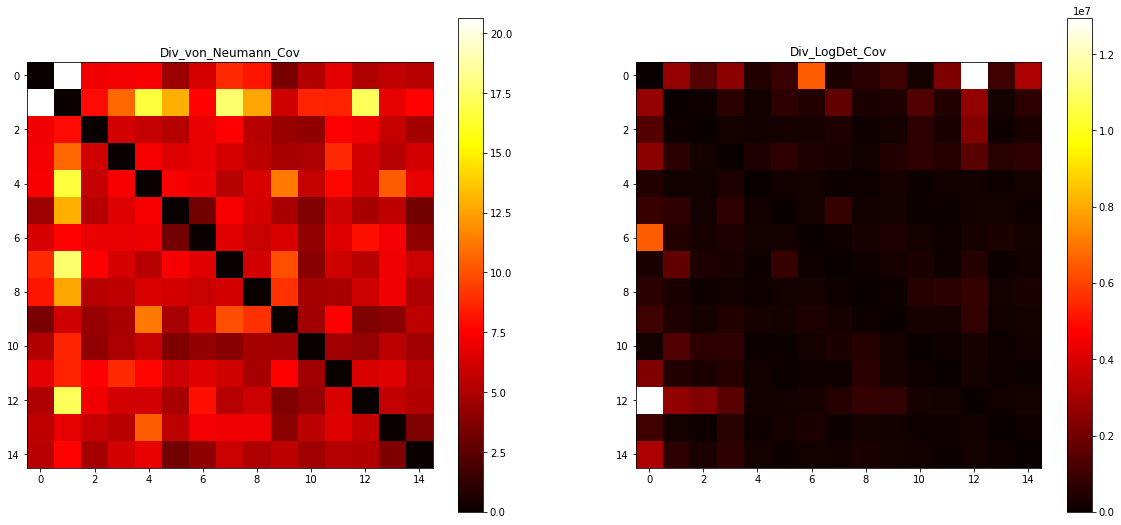

In [19]:
# print("linear kernel")
# plt.subplots_adjust(wspace=1, hspace=1)

# f = plt.figure(figsize=(20,20))

# ax1 = f.add_subplot(221)
# i1 = ax1.imshow(Div_von_Neumann_Cov, cmap='hot', interpolation='nearest')
# plt.title("Div_von_Neumann_Cov")
# plt.colorbar(i1,ax=ax1)


# ax1 = f.add_subplot(222)
# i1 = ax1.imshow(Div_von_Neumann_CorrEnt, cmap='hot', interpolation='nearest')
# plt.title("Div_von_Neumann_CorrEnt")
# plt.colorbar(i1,ax=ax1)

# ax1 = f.add_subplot(223)
# i1 = ax1.imshow(Div_LogDet_Cov, cmap='hot', interpolation='nearest')
# plt.title("Div_LogDet_Cov")
# plt.colorbar(i1,ax=ax1)

# ax1 = f.add_subplot(224)
# i1 = ax1.imshow(Div_LogDet_CorrEnt, cmap='hot', interpolation='nearest')
# plt.title("Div_LogDet_CorrEnt")
# plt.colorbar(i1,ax=ax1)

print("linear kernel")
plt.subplots_adjust(wspace=1, hspace=1)

f = plt.figure(figsize=(20,20))

ax1 = f.add_subplot(221)
i1 = ax1.imshow(Div_von_Neumann_Cov, cmap='hot', interpolation='nearest')
plt.title("Div_von_Neumann_Cov")
plt.colorbar(i1,ax=ax1)

ax1 = f.add_subplot(222)
i1 = ax1.imshow(Div_LogDet_Cov, cmap='hot', interpolation='nearest')
plt.title("Div_LogDet_Cov")
plt.colorbar(i1,ax=ax1)

In [11]:
print(Div_von_Neumann_Cov)

[[ 6.82121026e-13  2.06470364e+01  7.11002207e+00  7.19746883e+00
   7.40672070e+00  4.55613979e+00  6.35045330e+00  8.82141366e+00
   8.22266088e+00  3.41756109e+00  5.19931749e+00  6.77260869e+00
   5.11394215e+00  5.56585915e+00  5.33562105e+00]
 [ 2.06470364e+01  3.63797881e-12  7.84470985e+00  1.07586318e+01
   1.66238814e+01  1.29381627e+01  7.59928361e+00  1.76548061e+01
   1.25844291e+01  6.12886993e+00  8.70632308e+00  8.58892096e+00
   1.71935200e+01  6.79305701e+00  7.61660487e+00]
 [ 7.11002207e+00  7.84470985e+00  4.54747351e-13  6.16491070e+00
   5.79294796e+00  5.24553180e+00  6.92605810e+00  7.57012959e+00
   5.36045951e+00  4.38971441e+00  4.11545650e+00  7.54027182e+00
   7.12580647e+00  5.77917183e+00  4.77227377e+00]
 [ 7.19746883e+00  1.07586318e+01  6.16491070e+00 -1.25055521e-12
   7.26488790e+00  6.48832689e+00  6.87119842e+00  6.35446488e+00
   5.49460925e+00  4.91456339e+00  4.97988424e+00  8.83633917e+00
   6.13616606e+00  5.34888998e+00  6.19153892e+00]
 [ 7

In [12]:
print(Div_LogDet_Cov)

[[ 5.68434189e-14  2.68481550e+06  1.41885601e+06  2.55597022e+06
   4.89478362e+05  9.23019012e+05  6.51579235e+06  3.57154702e+05
   6.46565678e+05  1.04847655e+06  2.04710271e+05  2.26592534e+06
   1.29544993e+07  1.02522273e+06  3.10948046e+06]
 [ 2.68481550e+06  0.00000000e+00  1.17386681e+05  6.28961491e+05
   1.65950888e+05  7.14893916e+05  4.69612912e+05  1.70728364e+06
   3.69620025e+05  4.26763081e+05  1.39265947e+06  4.84306336e+05
   2.67021565e+06  2.40057545e+05  7.02824610e+05]
 [ 1.41885601e+06  1.17386681e+05  0.00000000e+00  2.17443880e+05
   1.77106499e+05  2.42092768e+05  2.75948655e+05  4.35261924e+05
   1.01556243e+05  2.18111023e+05  6.83591249e+05  3.35946927e+05
   2.33961212e+06  1.06344190e+05  3.33369348e+05]
 [ 2.55597022e+06  6.28961491e+05  2.17443880e+05  0.00000000e+00
   4.09954550e+05  7.30424437e+05  4.05703805e+05  3.50923708e+05
   1.91915074e+05  4.98048491e+05  7.10210314e+05  5.46013149e+05
   1.55104511e+06  5.98799854e+05  7.23136473e+05]
 [ 4

In [20]:
von_Neumann_Cov_X =np.zeros((len(Features), len(Features)))
# von_Neumann_CorrEnt_X =np.zeros((len(Features), len(Features)))

LogDet_Cov_X =np.zeros((len(Features), len(Features)))
# LogDet_CorrEnt_X =np.zeros((len(Features), len(Features)))


for i in range(len(Features)):        
    for j in range(len(Features)):
        von_Neumann_Cov_X[i,j] = von_Neumann_divergence_Eff(Persons_Cov_X[i], Persons_Cov_X[j])
        # von_Neumann_CorrEnt_X[i,j] = von_Neumann_divergence_Eff(Persons_CorrEnt_X[i], Persons_CorrEnt_X[j])
        LogDet_Cov_X[i,j] = log_det_divergenceEigSort(Persons_Cov_X[i], Persons_Cov_X[j])
        # LogDet_CorrEnt_X[i,j] = log_det_divergenceEigSort(Persons_CorrEnt_X[i], Persons_CorrEnt_X[j])


Div_von_Neumann_Cov_Un =np.zeros((len(Features), len(Features)))
# Div_von_Neumann_CorrEnt_Un =np.zeros((len(Features), len(Features)))
Div_LogDet_Cov_Un =np.zeros((len(Features), len(Features)))
# Div_LogDet_CorrEnt_Un =np.zeros((len(Features), len(Features)))

for i in range(len(Features)):        
    for j in range(i+1):
        Div_von_Neumann_Cov_Un[i,j] = 0.5 * (von_Neumann_Cov_X[i,j] + von_Neumann_Cov_X[j,i])
        # Div_von_Neumann_CorrEnt_Un[i,j] = 0.5*(von_Neumann_CorrEnt_X[i,j] + von_Neumann_CorrEnt_X[j,i])
        Div_LogDet_Cov_Un[i,j] = 0.5 * (LogDet_Cov_X[i,j] + LogDet_Cov_X[j,i])
        # Div_LogDet_CorrEnt_Un[i,j] = 0.5 * (LogDet_CorrEnt_X[i,j] + LogDet_CorrEnt_X[j,i])
        Div_von_Neumann_Cov_Un[j,i] = Div_von_Neumann_Cov_Un[i,j]
        # Div_von_Neumann_CorrEnt_Un[j,i] = Div_von_Neumann_CorrEnt_Un[i,j]
        Div_LogDet_Cov_Un[j,i] = Div_LogDet_Cov_Un[i,j]
        # Div_LogDet_CorrEnt_Un[j,i] = Div_LogDet_CorrEnt_Un[i,j]

linear kernel


<Figure size 432x288 with 0 Axes>

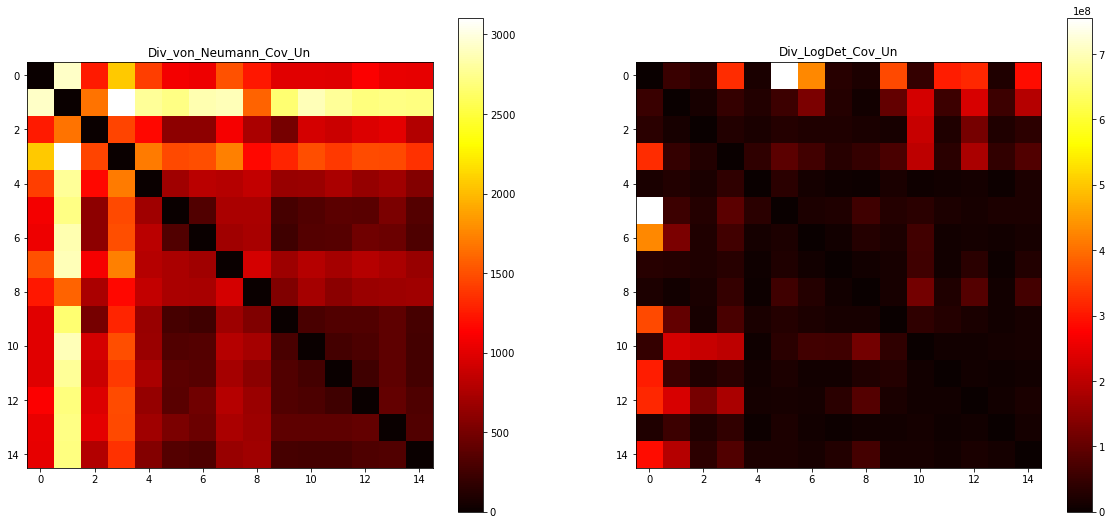

In [21]:
# print("linear kernel")
# plt.subplots_adjust(wspace=1, hspace=1)

# f = plt.figure(figsize=(20,20))

# ax1 = f.add_subplot(221)
# i1 = ax1.imshow(Div_von_Neumann_Cov_Un, cmap='hot', interpolation='nearest')
# plt.title("Div_von_Neumann_Cov_Un")
# plt.colorbar(i1,ax=ax1)


# ax1 = f.add_subplot(222)
# i1 = ax1.imshow(Div_von_Neumann_CorrEnt_Un, cmap='hot', interpolation='nearest')
# plt.title("Div_von_Neumann_CorrEnt_Un")
# plt.colorbar(i1,ax=ax1)

# ax1 = f.add_subplot(223)
# i1 = ax1.imshow(Div_LogDet_Cov_Un, cmap='hot', interpolation='nearest')
# plt.title("Div_LogDet_Cov_Un")
# plt.colorbar(i1,ax=ax1)

# ax1 = f.add_subplot(224)
# i1 = ax1.imshow(Div_LogDet_CorrEnt_Un, cmap='hot', interpolation='nearest')
# plt.title("Div_LogDet_CorrEnt_Un")
# plt.colorbar(i1,ax=ax1)

print("linear kernel")
plt.subplots_adjust(wspace=1, hspace=1)

f = plt.figure(figsize=(20,20))

ax1 = f.add_subplot(221)
i1 = ax1.imshow(Div_von_Neumann_Cov_Un, cmap='hot', interpolation='nearest')
plt.title("Div_von_Neumann_Cov_Un")
plt.colorbar(i1,ax=ax1)

ax1 = f.add_subplot(222)
i1 = ax1.imshow(Div_LogDet_Cov_Un, cmap='hot', interpolation='nearest')
plt.title("Div_LogDet_Cov_Un")
plt.colorbar(i1,ax=ax1)

In [22]:
print(Div_von_Neumann_Cov_Un)

[[-3.41060513e-13  2.92667586e+03  1.25684777e+03  2.06704126e+03
   1.43044841e+03  1.09118447e+03  1.06519510e+03  1.50617911e+03
   1.24622513e+03  1.00256403e+03  9.98473435e+02  9.91698752e+02
   1.11795490e+03  1.03892609e+03  1.02216198e+03]
 [ 2.92667586e+03 -9.09494702e-13  1.66912751e+03  3.10573407e+03
   2.78797411e+03  2.72750955e+03  2.85383398e+03  2.88556926e+03
   1.59432805e+03  2.66070215e+03  2.88228975e+03  2.78283046e+03
   2.69532670e+03  2.72285342e+03  2.70732918e+03]
 [ 1.25684777e+03  1.66912751e+03 -3.97903932e-13  1.44517562e+03
   1.17201818e+03  6.09338973e+02  6.14686573e+02  1.09631979e+03
   7.44608530e+02  5.04456888e+02  9.42295517e+02  8.92075259e+02
   9.78340725e+02  1.01558198e+03  7.80870011e+02]
 [ 2.06704126e+03  3.10573407e+03  1.44517562e+03 -2.27373675e-13
   1.70084644e+03  1.47373562e+03  1.49401259e+03  1.72905417e+03
   1.17034265e+03  1.30151503e+03  1.49638991e+03  1.40623244e+03
   1.48314332e+03  1.47777224e+03  1.36499100e+03]
 [ 1

In [23]:
print(Div_LogDet_Cov_Un)

[[0.00000000e+00 5.56175830e+07 3.83021956e+07 3.26682890e+08
  2.01217067e+07 7.55699306e+08 4.29406838e+08 3.40395213e+07
  2.17695868e+07 3.59334911e+08 5.01166359e+07 3.09137236e+08
  3.20595332e+08 2.36240497e+07 2.90337879e+08]
 [5.56175830e+07 0.00000000e+00 1.75985702e+07 4.78268220e+07
  2.67805636e+07 5.74924649e+07 1.27970138e+08 3.09782791e+07
  1.04390962e+07 1.01263664e+08 2.30201562e+08 5.76013406e+07
  2.30260724e+08 5.80114215e+07 1.92061542e+08]
 [3.83021956e+07 1.75985702e+07 0.00000000e+00 2.69188607e+07
  1.97764497e+07 2.98836194e+07 2.55906452e+07 2.39508462e+07
  1.83744543e+07 1.70914155e+07 2.14958717e+08 2.39789892e+07
  1.23410997e+08 2.52450034e+07 4.01111866e+07]
 [3.26682890e+08 4.78268220e+07 2.69188607e+07 0.00000000e+00
  4.26104062e+07 9.24421738e+07 6.37989685e+07 3.35362540e+07
  4.92435599e+07 7.19266012e+07 2.01857412e+08 3.80554180e+07
  1.81580759e+08 4.71186550e+07 8.24186685e+07]
 [2.01217067e+07 2.67805636e+07 1.97764497e+07 4.26104062e+07
  

In [29]:
# load data
EEG_X = sio.loadmat('./SEED_III/EEG_X.mat')['X'][0]     # 15 x 3394 x 310
EEG_Y = sio.loadmat('./SEED_III/EEG_Y.mat')['Y'][0]     # 15 x 3394 x 1

Features_unfold = [0] * (2*EEG_X.shape[0])
for i in range(EEG_X.shape[0]):
    Features_unfold[2*i] = np.array(EEG_X[i][:(EEG_X[i].shape[0]//2)])
    Features_unfold[2*i+1] = np.array(EEG_X[i][(EEG_X[i].shape[0]//2):])

Labels_unfold = [0] * (2*EEG_Y.shape[0])
for i in range(EEG_Y.shape[0]):
    Labels_unfold[2*i] = np.array(EEG_Y[i][:(EEG_Y[i].shape[0]//2)])
    Labels_unfold[2*i+1] = np.array(EEG_Y[i][(EEG_Y[i].shape[0]//2):])

print(len(Features_unfold))
print(Features_unfold[0].shape)
print(len(Labels_unfold))
print(Labels_unfold[0].shape)

30
(1697, 310)
30
(1697, 1)


In [30]:
Persons_Cov_X_unfold = []
Persons_Cov_XY_unfold = []
Persons_CorrEnt_X_unfold = []
Persons_CorrEnt_XY_unfold = []
for i in range(len(Features_unfold)):
    print("Expand", i)

    data = Features_unfold[i].transpose()
    Cov = np.array([[np.cov(data[i,:],data[j,:])[0,1] for j in range(data.shape[0])] for i in range(data.shape[0])])
    Persons_Cov_X_unfold.append(Cov)

    # data = Features_unfold[i]
    # Corr = corrent_matrix(data, kernel_size=KERNEL_SIZE)
    # Persons_CorrEnt_X_unfold.append(Corr)

    data = np.hstack((Features_unfold[i], Labels_unfold[i])).transpose()
    Cov = np.array([[np.cov(data[i,:],data[j,:])[0,1] for j in range(data.shape[0])] for i in range(data.shape[0])])
    Persons_Cov_XY_unfold.append(Cov)

    # data =np.hstack((Features_unfold[i], Labels_unfold[i]))
    # Corr = corrent_matrix(data, kernel_size=KERNEL_SIZE)
    # Persons_CorrEnt_XY_unfold.append(Corr)

Expand 0
Expand 1
Expand 2
Expand 3
Expand 4
Expand 5
Expand 6
Expand 7
Expand 8
Expand 9
Expand 10
Expand 11
Expand 12
Expand 13
Expand 14
Expand 15
Expand 16
Expand 17
Expand 18
Expand 19
Expand 20
Expand 21
Expand 22
Expand 23
Expand 24
Expand 25
Expand 26
Expand 27
Expand 28
Expand 29


In [33]:
von_Neumann_Cov_X_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
von_Neumann_Cov_XY_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
# von_Neumann_CorrEnt_X_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
# von_Neumann_CorrEnt_XY_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))

LogDet_Cov_X_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
LogDet_Cov_XY_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
# LogDet_CorrEnt_X_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
# LogDet_CorrEnt_XY_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))


for i in trange(len(Features_unfold)):        
    for j in range(len(Features_unfold)):
        von_Neumann_Cov_X_unfold[i,j] = von_Neumann_divergence_Eff(Persons_Cov_X_unfold[i], Persons_Cov_X_unfold[j])
        von_Neumann_Cov_XY_unfold[i,j] = von_Neumann_divergence_Eff(Persons_Cov_XY_unfold[i], Persons_Cov_XY_unfold[j])
        # von_Neumann_CorrEnt_X_unfold[i,j] = von_Neumann_divergence_Eff(Persons_CorrEnt_X_unfold[i], Persons_CorrEnt_X_unfold[j])
        # von_Neumann_CorrEnt_XY_unfold[i,j] = von_Neumann_divergence_Eff(Persons_CorrEnt_XY_unfold[i], Persons_CorrEnt_XY_unfold[j])
        LogDet_Cov_X_unfold[i,j] = log_det_divergenceEigSort(Persons_Cov_X_unfold[i], Persons_Cov_X_unfold[j])
        LogDet_Cov_XY_unfold[i,j] = log_det_divergenceEigSort(Persons_Cov_XY_unfold[i], Persons_Cov_XY_unfold[j])
        # LogDet_CorrEnt_X_unfold[i,j] = log_det_divergenceEigSort(Persons_CorrEnt_X_unfold[i], Persons_CorrEnt_X_unfold[j])
        # LogDet_CorrEnt_XY_unfold[i,j] = log_det_divergenceEigSort(Persons_CorrEnt_XY_unfold[i], Persons_CorrEnt_XY_unfold[j])


Div_von_Neumann_Cov_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
# Div_von_Neumann_CorrEnt_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
Div_LogDet_Cov_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
# Div_LogDet_CorrEnt_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))

for i in trange(len(Features_unfold)):        
    for j in range(i+1):
        Div_von_Neumann_Cov_unfold[i,j] = 0.5 * (von_Neumann_Cov_XY_unfold[i,j] + von_Neumann_Cov_XY_unfold[j,i] - von_Neumann_Cov_X_unfold[i,j] - von_Neumann_Cov_X_unfold[j,i])
        # Div_von_Neumann_CorrEnt_unfold[i,j] = 0.5*(von_Neumann_CorrEnt_XY_unfold[i,j] + von_Neumann_CorrEnt_XY_unfold[j,i] - von_Neumann_CorrEnt_X_unfold[i,j] - von_Neumann_CorrEnt_X_unfold[j,i])
        Div_LogDet_Cov_unfold[i,j] = 0.5 * (LogDet_Cov_XY_unfold[i,j] + LogDet_Cov_XY_unfold[j,i] - LogDet_Cov_X_unfold[i,j] - LogDet_Cov_X_unfold[j,i])
        # Div_LogDet_CorrEnt_unfold[i,j] = 0.5 * (LogDet_CorrEnt_XY_unfold[i,j] + LogDet_CorrEnt_XY_unfold[j,i] - LogDet_CorrEnt_X_unfold[i,j] - LogDet_CorrEnt_X_unfold[j,i])
        Div_von_Neumann_Cov_unfold[j,i] = Div_von_Neumann_Cov_unfold[i,j]
        # Div_von_Neumann_CorrEnt_unfold[j,i] = Div_von_Neumann_CorrEnt_unfold[i,j]
        Div_LogDet_Cov_unfold[j,i] = Div_LogDet_Cov_unfold[i,j]
        # Div_LogDet_CorrEnt_unfold[j,i] = Div_LogDet_CorrEnt_unfold[i,j]

100%|██████████| 30/30 [00:00<00:00, 13991.90it/s]


linear kernel


<Figure size 432x288 with 0 Axes>

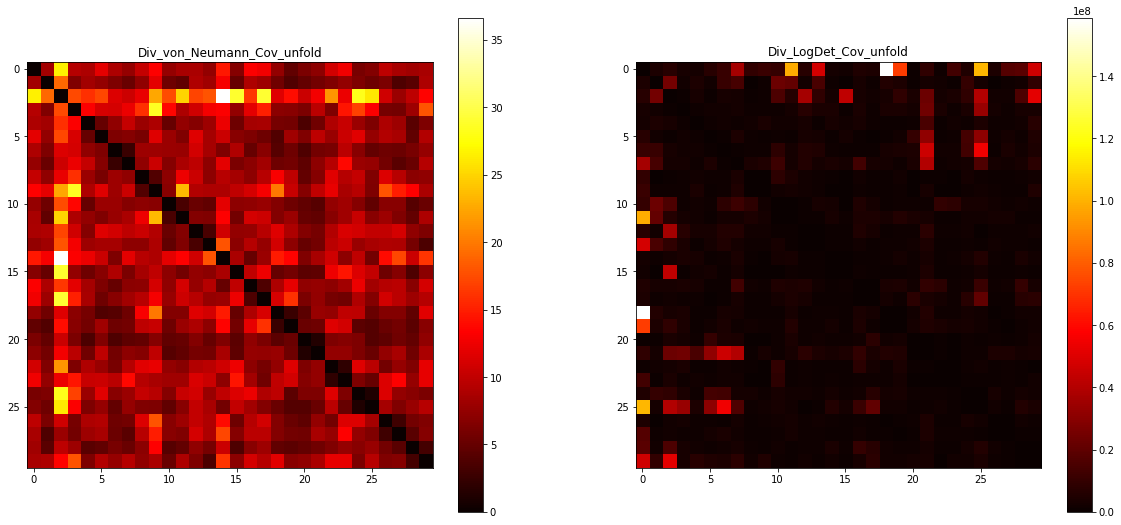

In [34]:
# print("linear kernel")
# plt.subplots_adjust(wspace=1, hspace=1)

# f = plt.figure(figsize=(20,20))

# ax1 = f.add_subplot(221)
# i1 = ax1.imshow(Div_von_Neumann_Cov_unfold, cmap='hot', interpolation='nearest')
# plt.title("Div_von_Neumann_Cov_unfold")
# plt.colorbar(i1,ax=ax1)


# ax1 = f.add_subplot(222)
# i1 = ax1.imshow(Div_von_Neumann_CorrEnt_unfold, cmap='hot', interpolation='nearest')
# plt.title("Div_von_Neumann_CorrEnt_unfold")
# plt.colorbar(i1,ax=ax1)

# ax1 = f.add_subplot(223)
# i1 = ax1.imshow(Div_LogDet_Cov_unfold, cmap='hot', interpolation='nearest')
# plt.title("Div_LogDet_Cov_unfold")
# plt.colorbar(i1,ax=ax1)

# ax1 = f.add_subplot(224)
# i1 = ax1.imshow(Div_LogDet_CorrEnt_unfold, cmap='hot', interpolation='nearest')
# plt.title("Div_LogDet_CorrEnt_unfold")
# plt.colorbar(i1,ax=ax1)

print("linear kernel")
plt.subplots_adjust(wspace=1, hspace=1)

f = plt.figure(figsize=(20,20))

ax1 = f.add_subplot(221)
i1 = ax1.imshow(Div_von_Neumann_Cov_unfold, cmap='hot', interpolation='nearest')
plt.title("Div_von_Neumann_Cov_unfold")
plt.colorbar(i1,ax=ax1)

ax1 = f.add_subplot(222)
i1 = ax1.imshow(Div_LogDet_Cov_unfold, cmap='hot', interpolation='nearest')
plt.title("Div_LogDet_Cov_unfold")
plt.colorbar(i1,ax=ax1)

In [36]:
von_Neumann_Cov_X_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
# von_Neumann_CorrEnt_X_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))

LogDet_Cov_X_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
# LogDet_CorrEnt_X_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))


for i in trange(len(Features_unfold)):        
    for j in range(len(Features_unfold)):
        von_Neumann_Cov_X_unfold[i,j] = von_Neumann_divergence_Eff(Persons_Cov_X_unfold[i], Persons_Cov_X_unfold[j])
        # von_Neumann_CorrEnt_X_unfold[i,j] = von_Neumann_divergence_Eff(Persons_CorrEnt_X_unfold[i], Persons_CorrEnt_X_unfold[j])
        LogDet_Cov_X_unfold[i,j] = log_det_divergenceEigSort(Persons_Cov_X_unfold[i], Persons_Cov_X_unfold[j])
        # LogDet_CorrEnt_X_unfold[i,j] = log_det_divergenceEigSort(Persons_CorrEnt_X_unfold[i], Persons_CorrEnt_X_unfold[j])


Div_von_Neumann_Cov_Un_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
# Div_von_Neumann_CorrEnt_Un_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
Div_LogDet_Cov_Un_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))
# Div_LogDet_CorrEnt_Un_unfold =np.zeros((len(Features_unfold), len(Features_unfold)))

for i in trange(len(Features_unfold)):        
    for j in range(i+1):
        Div_von_Neumann_Cov_Un_unfold[i,j] = 0.5 * (von_Neumann_Cov_X_unfold[i,j] + von_Neumann_Cov_X_unfold[j,i])
        # Div_von_Neumann_CorrEnt_Un_unfold[i,j] = 0.5*(von_Neumann_CorrEnt_X_unfold[i,j] + von_Neumann_CorrEnt_X_unfold[j,i])
        Div_LogDet_Cov_Un_unfold[i,j] = 0.5 * (LogDet_Cov_X_unfold[i,j] + LogDet_Cov_X_unfold[j,i])
        # Div_LogDet_CorrEnt_Un_unfold[i,j] = 0.5 * (LogDet_CorrEnt_X_unfold[i,j] + LogDet_CorrEnt_X_unfold[j,i])
        Div_von_Neumann_Cov_Un_unfold[j,i] = Div_von_Neumann_Cov_Un_unfold[i,j]
        # Div_von_Neumann_CorrEnt_Un_unfold[j,i] = Div_von_Neumann_CorrEnt_Un_unfold[i,j]
        Div_LogDet_Cov_Un_unfold[j,i] = Div_LogDet_Cov_Un_unfold[i,j]
        # Div_LogDet_CorrEnt_Un_unfold[j,i] = Div_LogDet_CorrEnt_Un_unfold[i,j]

100%|██████████| 30/30 [00:00<00:00, 29725.75it/s]


linear kernel


<Figure size 432x288 with 0 Axes>

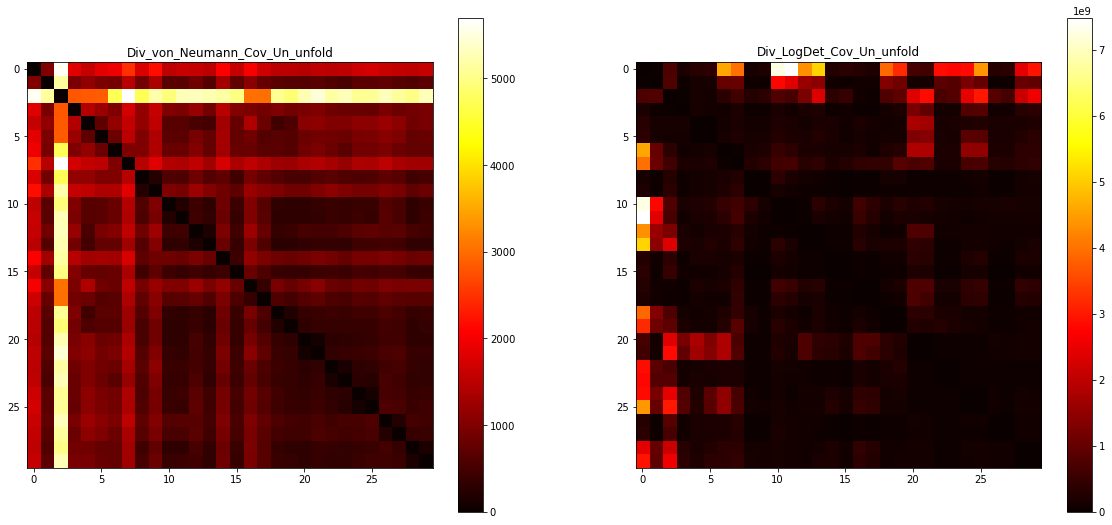

In [37]:
# print("linear kernel")
# plt.subplots_adjust(wspace=1, hspace=1)

# f = plt.figure(figsize=(20,20))

# ax1 = f.add_subplot(221)
# i1 = ax1.imshow(Div_von_Neumann_Cov_Un_unfold, cmap='hot', interpolation='nearest')
# plt.title("Div_von_Neumann_Cov_Un_unfold")
# plt.colorbar(i1,ax=ax1)


# ax1 = f.add_subplot(222)
# i1 = ax1.imshow(Div_von_Neumann_CorrEnt_Un_unfold, cmap='hot', interpolation='nearest')
# plt.title("Div_von_Neumann_CorrEnt_Un_unfold")
# plt.colorbar(i1,ax=ax1)

# ax1 = f.add_subplot(223)
# i1 = ax1.imshow(Div_LogDet_Cov_Un_unfold, cmap='hot', interpolation='nearest')
# plt.title("Div_LogDet_Cov_Un_unfold")
# plt.colorbar(i1,ax=ax1)

# ax1 = f.add_subplot(224)
# i1 = ax1.imshow(Div_LogDet_CorrEnt_Un_unfold, cmap='hot', interpolation='nearest')
# plt.title("Div_LogDet_CorrEnt_Un_unfold")
# plt.colorbar(i1,ax=ax1)

print("linear kernel")
plt.subplots_adjust(wspace=1, hspace=1)

f = plt.figure(figsize=(20,20))

ax1 = f.add_subplot(221)
i1 = ax1.imshow(Div_von_Neumann_Cov_Un_unfold, cmap='hot', interpolation='nearest')
plt.title("Div_von_Neumann_Cov_Un_unfold")
plt.colorbar(i1,ax=ax1)

ax1 = f.add_subplot(222)
i1 = ax1.imshow(Div_LogDet_Cov_Un_unfold, cmap='hot', interpolation='nearest')
plt.title("Div_LogDet_Cov_Un_unfold")
plt.colorbar(i1,ax=ax1)